# pre-processing

In [9]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Fare']]

y = data.Survived

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Steps of clustering research

# DBSCAN

## DBSCAN - scaling

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
pca_scaler = PCA(n_components=4)

standard_scaler.fit(x)
minmax_scaler.fit(x)
pca_scaler.fit(x)

standard_x = standard_scaler.transform(x)
minmax_x = minmax_scaler.transform(x)
pca_x = pca_scaler.transform(x)

C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\zigi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


## DBSCAN - choose the number of cluster - PCA

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.01, min_samples=1).fit(standard_x[:,[1,6]]).fit(standard_x)#2*x.shape[1] 0.010990990990990991 #eps=0.5, min_samples=2*x.shape[1]
y_pred = dbscan.labels_


cluster_center = dbscan.components_
cluster_center.shape
x.shape

(891, 7)

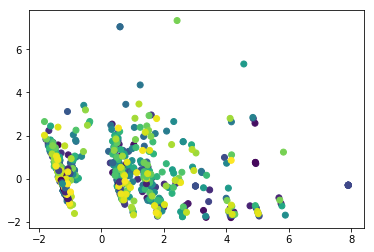

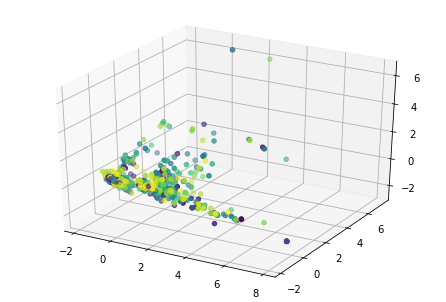

In [33]:
#check result using PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)


#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,alpha=1)
plt.show()

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)
plt.show()

## DBSCAN - silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [23]:
from sklearn.metrics import silhouette_samples

dbscan = DBSCAN(eps=0.5, min_samples=2*x.shape[1]).fit(standard_x)#
y_pred = dbscan.labels_

dbscan_silhouette_samples = silhouette_samples(x,y_pred)
dbscan_silhouette_samples

array([-7.86325111e-03, -9.70422886e-02,  6.96514329e-02, -3.88743076e-01,
        9.21317366e-02,  9.00631277e-02, -1.62366266e-01, -8.84965706e-01,
       -8.09007748e-01, -2.27190663e-01,  7.31486329e-01, -1.10549695e-01,
       -2.79508039e-02, -7.12826351e-01, -1.98420515e-01, -4.67945564e-02,
       -8.04486874e-01, -1.52940180e-01, -1.90615980e-01,  1.23694764e-01,
       -4.86745480e-01, -1.48420896e-01, -1.33427347e-01, -4.38368720e-01,
       -8.61004677e-01, -7.20280620e-01,  1.23694764e-01,  1.66112110e-01,
        1.11926110e-01,  1.11461716e-01, -3.81626366e-01,  1.99780209e-01,
        1.15270186e-01,  1.51143008e-02,  2.29045092e-02, -3.87489507e-01,
        1.23645540e-01, -1.43862445e-02, -7.71498419e-01, -1.91482175e-01,
       -8.53837690e-02, -1.75058316e-01,  1.11461716e-01, -6.19760055e-01,
       -3.56452871e-02,  1.06299262e-01, -2.25371360e-02,  1.15270186e-01,
       -8.55486340e-01,  5.61368509e-02, -6.29307152e-01, -7.47241580e-03,
       -3.07013952e-02, -

In [24]:
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.4, min_samples=2*x.shape[1]).fit(standard_x[:,[1,6]])#standard_x , standard_x[:,[2,3]]
y_pred = dbscan.labels_

dbscan_silhouette_score = silhouette_score(x,y_pred)
dbscan_silhouette_score

0.22363922917352105

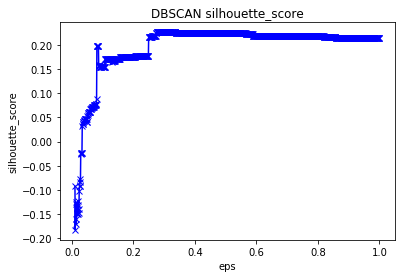

In [25]:


silhouette_score_list = []
eps_range = np.linspace(0.01,1,1000)

for eps_val in eps_range:
    dbscan = DBSCAN(eps=eps_val, min_samples=2*x.shape[1]).fit(standard_x[:,[1,6]])
    y_pred = dbscan.labels_
    
    if len(np.unique(y_pred)) > 1:
        dbscan_silhouette_score = silhouette_score(x,y_pred)
        silhouette_score_list.append(dbscan_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    


plt.plot(eps_range, silhouette_score_list, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhouette_score')
plt.title('DBSCAN silhouette_score')
plt.show()




## DBSCAN - silhouette_score - hyperparameter

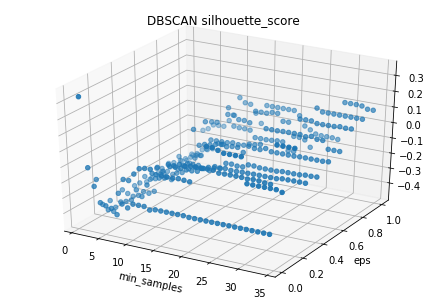

In [28]:
from mpl_toolkits.mplot3d import Axes3D

silhouette_score_list = []
eps_range = np.linspace(0.01,1,10)
min_samples_range = range(1,5*x.shape[1],1)

eps_list = list()
min_samples_list = list()

for eps_val in eps_range:
    for min_samples_val in min_samples_range:
    
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val).fit(standard_x)
        y_pred = dbscan.labels_

        if len(np.unique(y_pred)) > 1:
            dbscan_silhouette_score = silhouette_score(x,y_pred)
            silhouette_score_list.append(dbscan_silhouette_score)
        else:
            silhouette_score_list.append(-1)
        eps_list.append(eps_val)
        min_samples_list.append(min_samples_val)
    

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(min_samples_list,eps_list, silhouette_score_list)#,c=y_pred
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('DBSCAN silhouette_score')
plt.show()



In [29]:
silhouette_score_np = np.array(silhouette_score_list)
silhouette_score_np.argmax()
silhouette_score_list[silhouette_score_np.argmax()]

0.3316137404139652

In [30]:
eps_range[silhouette_score_np.argmax()]

0.01

In [31]:
min_samples_range[silhouette_score_np.argmax()]

1

## DBSCAN - Feature Importance - Feature Selection

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=2*x.shape[1]).fit(standard_x)#
y_pred = dbscan.labels_

0
1
2
3
4
5
6


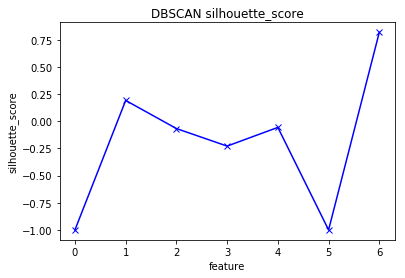

In [16]:
silhouette_score_list = []
feature_range = range(0,standard_x.shape[1])

for i in feature_range:
    current_x = standard_x[:,i].reshape(-1, 1)
    
    dbscan = DBSCAN(eps=0.5, min_samples=2).fit(current_x)# min_samples=2*x.shape[1]
    y_pred = dbscan.labels_
    
    if len(np.unique(y_pred)) > 1:
        dbscan_silhouette_score = silhouette_score(x,y_pred)
        silhouette_score_list.append(dbscan_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    print(i)
    


plt.plot(feature_range, silhouette_score_list, 'bx-')
plt.xlabel('feature')
plt.ylabel('silhouette_score')
plt.title('DBSCAN silhouette_score')
plt.show()

In [ ]:
standard_x.shape[1]

## DBSCAN - make cluster

In [50]:
dbscan = DBSCAN(eps=0.4, min_samples=2*x.shape[1]).fit(standard_x).fit(standard_x)#2*x.shape[1] 0.010990990990990991 #eps=0.5, min_samples=2*x.shape[1]
y_pred = dbscan.labels_

cluster_data = pd.DataFrame(x)
cluster_data['cluster'] = y_pred
np.unique(y_pred)

array([-1,  0,  1,  2], dtype=int64)

In [51]:
group_0 = cluster_data[cluster_data.cluster == 0]
group_1 = cluster_data[cluster_data.cluster == 1]
group_2 = cluster_data[cluster_data.cluster == 2]
group_minus_1 = cluster_data[cluster_data.cluster == -1]


In [52]:
pd.Series(y_pred).value_counts()

 1    493
-1    320
 0     61
 2     17
dtype: int64

In [53]:
group_2

,Cabin Num,IsAlone,FamilySize,Parch,SibSp,Age,Fare,cluster
65,0,0,3,1,1,28.0,15.2458,2
128,0,0,3,1,1,28.0,22.3583,2
251,0,0,3,1,1,29.0,10.4625,2
279,0,0,3,1,1,35.0,20.2500,2
312,0,0,3,1,1,26.0,26.0000,2
328,0,0,3,1,1,31.0,20.5250,2
416,0,0,3,1,1,34.0,32.5000,2
423,0,0,3,1,1,28.0,14.4000,2
548,0,0,3,1,1,33.0,20.5250,2
595,0,0,3,1,1,36.0,24.1500,2
